# Импорт библиотек

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Чтение файлов

In [63]:
df_page1 = pd.read_excel('Продажи и отключения за год.xlsx', sheet_name='Продажи за год')
df_page2 = pd.read_excel('Продажи и отключения за год.xlsx', sheet_name='Отключения за год')
df_client = pd.read_excel('Доп. свойства клиентов.xlsx')

Преобразуем все "ID клиента" в строки для слияния файлов в дальнейшем

In [64]:
df_page1['ID клиента'] = df_page1['ID клиента'].astype(str)
df_page2['ID клиента'] = df_page2['ID клиента'].astype(str)
df_client['ID клиента'] = df_client['ID клиента'].astype(str)

# Посмотрим "Продажи за год"

In [65]:
df_page1

,ID клиента,Месяц продажи,ВКСП,Сумма счета
0,08056,2020-05-01,0.00,15240.50
1,42381,2020-05-01,0.00,NaN
2,51895,2020-05-01,0.00,5485.71
3,57656,2020-05-01,0.26,12500.00
4,60065,2020-05-01,0.70,4398.62
...,...,...,...,...
237,40993,2021-04-01,0.80,6817.07
238,48949,2021-04-01,1.00,9356.76
239,65551,2021-04-01,1.30,7900.00
240,67227,2021-04-01,0.00,6220.37


Смотрим количество пропущенных значений

In [66]:
df_page1.isna().sum()

ID клиента       0
Месяц продажи    0
ВКСП             0
Сумма счета      8
dtype: int64

Заполним пропущенные значения "Сумма счета" нулями

In [67]:
df_page1.fillna(0, inplace=True)

Найдем дубликаты

In [68]:
duplicates = df_page1[df_page1.duplicated('ID клиента')]
duplicates

,ID клиента,Месяц продажи,ВКСП,Сумма счета


Дубликатов нет

# Посмотрим "Отключения за год"

In [69]:
df_page2

,ID клиента,ВКСП,Месяц отключения
0,13681,0.700,Май/2020
1,31803,0.750,Май/2020
2,39028,0.750,Май/2020
3,40346/1,1.325,Май/2020
4,45510,0.700,Май/2020
...,...,...,...
329,01470/13,NaN,Апрель/2021
330,01470/27,NaN,Апрель/2021
331,09344,1.560,Апрель/2021
332,25792,NaN,Апрель/2021


Переведем даты в нужный формат

In [70]:
# заменяем названия месяцов на порядковый номер
df_page2['Месяц отключения'] = df_page2['Месяц отключения'].str.replace(r'Январь', '01')
df_page2['Месяц отключения'] = df_page2['Месяц отключения'].str.replace(r'Февраль', '02')
df_page2['Месяц отключения'] = df_page2['Месяц отключения'].str.replace(r'Март', '03')
df_page2['Месяц отключения'] = df_page2['Месяц отключения'].str.replace(r'Апрель', '04')
df_page2['Месяц отключения'] = df_page2['Месяц отключения'].str.replace(r'Май', '05')
df_page2['Месяц отключения'] = df_page2['Месяц отключения'].str.replace(r'Июнь', '06')
df_page2['Месяц отключения'] = df_page2['Месяц отключения'].str.replace(r'Июль', '07')
df_page2['Месяц отключения'] = df_page2['Месяц отключения'].str.replace(r'Август', '08')
df_page2['Месяц отключения'] = df_page2['Месяц отключения'].str.replace(r'Сентябрь', '09')
df_page2['Месяц отключения'] = df_page2['Месяц отключения'].str.replace(r'Октябрь', '10')
df_page2['Месяц отключения'] = df_page2['Месяц отключения'].str.replace(r'Ноябрь', '11')
df_page2['Месяц отключения'] = df_page2['Месяц отключения'].str.replace(r'Декабрь', '12')

# переводим в формат даты
df_page2['Месяц отключения'] = pd.to_datetime(df_page2['Месяц отключения'], format='%m/%Y').dt.to_period('M').dt.to_timestamp()

df_page2.head(1)

,ID клиента,ВКСП,Месяц отключения
0,13681,0.7,2020-05-01


Посмотрим количество пропущенных значений

In [71]:
df_page2.isna().sum()

ID клиента           0
ВКСП                86
Месяц отключения     0
dtype: int64

Заменим пока пропущенные значения в поле "ВКСП" нулями, но потом возьмём их со страницы "Продажи за год"

In [72]:
df_page2.fillna(0, inplace=True)

Найдём дубликаты

In [73]:
duplicates = df_page2[df_page2.duplicated('ID клиента')]
duplicates

,ID клиента,ВКСП,Месяц отключения
333,64249,0.7,2021-04-01


Дубликат нашелся, посмотрим на него внимательнее

In [74]:
duplicates = df_page2[df_page2['ID клиента'] == '64249']
duplicates

,ID клиента,ВКСП,Месяц отключения
126,64249,0.7,2020-10-01
333,64249,0.7,2021-04-01


Посмотрим на данный "ID клиента" на странице "Продажи за год"

In [75]:
df_64249 = df_page1[df_page1['ID клиента'] == '64249']
df_64249

,ID клиента,Месяц продажи,ВКСП,Сумма счета
154,64249,2021-01-01,0.7,5849.84


Клиент 64249 был подключен ранее в этом году. У него истекла подписка 10.2020, затем он снова приобрел её с 01.2021 по 04.2021. Для удобства разделим в продажах записи об этом клиенте на 2 разных ID, позже соберем запись обратно в одну.

In [76]:
# изменяем "ID клиента" в "Отключениях за год"
df_page2.loc[126, 'ID клиента'] = '64249_1'
df_page2.loc[333, 'ID клиента'] = '64249_2'

# изменяем "ID клиента" в "Продажах за год"
df_page1.loc[154, 'ID клиента'] = '64249_2'

# добавляем новую запись
new_record = {'ID клиента': '64249_1', 'Месяц продажи': '2020-05-01', 'ВКСП': 0.7, 'Сумма счета': 0}
df_page1.loc[len(df_page1.index)] = new_record

# Объединим "Продажи за год" и "Отключения за год" в один файл

In [77]:
df_page1['Месяц продажи'] = pd.to_datetime(df_page1['Месяц продажи']).dt.date
df_page2['Месяц отключения'] = pd.to_datetime(df_page2['Месяц отключения']).dt.date

df_main = df_page1.merge(df_page2, on="ID клиента", how="outer")
df_main

,ID клиента,Месяц продажи,ВКСП_x,Сумма счета,ВКСП_y,Месяц отключения
0,08056,2020-05-01,0.00,15240.50,NaN,NaN
1,42381,2020-05-01,0.00,0.00,NaN,NaN
2,51895,2020-05-01,0.00,5485.71,NaN,NaN
3,57656,2020-05-01,0.26,12500.00,NaN,NaN
4,60065,2020-05-01,0.70,4398.62,NaN,NaN
...,...,...,...,...,...,...
547,00632/69,NaN,NaN,NaN,0.00,2021-04-01
548,01470/13,NaN,NaN,NaN,0.00,2021-04-01
549,01470/27,NaN,NaN,NaN,0.00,2021-04-01
550,09344,NaN,NaN,NaN,1.56,2021-04-01


Заполним пропущенные значения "Месяц продажи" минимальными из "Продажи за год"

Заполним пропущенные значения "Месяц отключения" максимальными из "Отключения за год"

В ТЗ указано, что "Системы Консультант+ оплачивается ежемесячно как подписка", поэтому важно знать, сколько месяцев в году был подписан каждый клиент

Посчитаем суммарно сколько месяцев в году был подписан каждый клиент (Максимальный месяц - Минимальный месяц)

In [78]:
# заполняем пропущенные значения
df_main['Месяц продажи'].fillna(min(df_page1['Месяц продажи']), inplace=True)
df_main['Месяц отключения'].fillna(max(df_page2['Месяц отключения']), inplace=True)

# удаляем лишние поля
df_main.drop('ВКСП_x', axis=1, inplace=True)
df_main.drop('ВКСП_y', axis=1, inplace=True)

# изменяем названия полей
df_main.rename(columns={'Месяц продажи': 'Минимальный месяц', 'Месяц отключения': 'Максимальный месяц'}, inplace=True)

# преобразуем значения в формат даты
df_main['Максимальный месяц'] = pd.to_datetime(df_main['Максимальный месяц'])
df_main['Минимальный месяц'] = pd.to_datetime(df_main['Минимальный месяц'])

# создаем новый столбец "Количество месяцев"
df_main['Подписан месяцев за год предварительно'] = (df_main['Максимальный месяц'] - df_main['Минимальный месяц']) / pd.Timedelta(days=30.44)

# округляем значения до целых чисел
df_main['Подписан месяцев за год предварительно'] = df_main['Подписан месяцев за год предварительно'].round()

df_main = df_main.sort_values(by='Подписан месяцев за год предварительно', ascending=True)

df_main.head(1)

,ID клиента,Минимальный месяц,Сумма счета,Максимальный месяц,Подписан месяцев за год предварительно
226,22303,2021-04-01,5661.31,2020-06-01,-10.0


У некоторых клиентов получилось отрицательные суммы месяцев. Например:


ID клиента: 22303

Минимальный месяц: 2021-04-01

Максимальный месяц: 2020-06-01

Подписан месяцев за год предварительно: -10.0

У данного клиента "Минимальный месяц" больше "Максимального месяца", что говорит о том, что клиент был подписан с какого-то периода ПО 06.2020 и затем вновь переподписался С 04.2021.

Для таких клиентов рассчитаем количество месяцев следующим образом:

Максимальный "Месяц отключения" из "Отключения за год" - Минимальный "Месяц продажи" из "Продажи за год" - количество месяцев перерыва (полученные отрицательные значения)

In [79]:
# считаем полное количество месяцев в данных
month_count = round((max(df_page2['Месяц отключения']) - min(df_page1['Месяц продажи'])) / pd.Timedelta(days=30.44))

# функция для подсчета числа месяцев подписки
def calculate_month_count(row):
    if row['Подписан месяцев за год предварительно'] >= 0:
        return row['Подписан месяцев за год предварительно'] + 1 # значениям равным 0 добавляем +1, тк не может быть подписка на 0 мес
    else:
        return month_count + row['Подписан месяцев за год предварительно'] + 2 # аналогично +2, тк 2 используются 2 периода

# функция проставляет 1 тем, кто был переподписан
def was_subscribed(row):
    if row['Подписан месяцев за год предварительно'] >= 0:
        return 0
    else:
        return 1

# применяем функции к DataFrame
df_main['Подписан месяцев за год'] = df_main.apply(calculate_month_count, axis=1)
df_main['Переподписка'] = df_main.apply(was_subscribed, axis=1)

# отсортируем по ID клиента и просмотрим глазами корректность данных
df_main = df_main.sort_values(by='ID клиента', ascending=True)
df_main

,ID клиента,Минимальный месяц,Сумма счета,Максимальный месяц,Подписан месяцев за год предварительно,Подписан месяцев за год,Переподписка
374,00240/89,2020-05-01,NaN,2020-11-01,6.0,7.0,0
539,00254,2020-05-01,NaN,2021-04-01,11.0,12.0,0
148,00274,2021-01-01,11436.12,2021-04-01,3.0,4.0,0
358,00296-15,2020-05-01,NaN,2020-11-01,6.0,7.0,0
303,00296-16,2020-05-01,NaN,2020-08-01,3.0,4.0,0
...,...,...,...,...,...,...,...
113,78020,2020-12-01,6734.45,2021-04-01,4.0,5.0,0
114,78024,2020-12-01,5661.31,2021-04-01,4.0,5.0,0
189,78062,2021-02-01,6789.53,2021-04-01,2.0,3.0,0
218,81152,2021-03-01,3730.20,2021-04-01,1.0,2.0,0


Поскольку "Необходимо провести анализ клиентов, которые купили системы", добавим полученную информацию только в файл "Продажи за год"

In [80]:
df_sales = pd.merge(df_page1, df_main[['ID клиента', 'Подписан месяцев за год']], on='ID клиента', how='left')
df_sales = pd.merge(df_sales, df_main[['ID клиента', 'Переподписка']], on='ID клиента', how='left')

# Посмотрим готовый финальный набор данных по продажам и отключениям

Посмотрим полученные значения для клиента 64249, которого мы разделяли на 2 записи ранее

In [81]:
df_64249 = df_sales[df_sales['ID клиента'].isin(['64249_1', '64249_2'])]
df_64249

,ID клиента,Месяц продажи,ВКСП,Сумма счета,Подписан месяцев за год,Переподписка
154,64249_2,2021-01-01,0.7,5849.84,4.0,0
242,64249_1,2020-05-01,0.7,0.00,6.0,0


Соберем полученные данные обратно в одну запись

In [82]:
new_record = {'ID клиента': '64249', 'Месяц продажи': '2021-01-01', 'ВКСП': 0.7,
              'Сумма счета': 5849.84, 'Подписан месяцев за год': 10, 'Переподписка': 1}
df_sales.loc[len(df_sales.index)] = new_record
df_sales = df_sales[~df_sales['ID клиента'].isin(['64249_1', '64249_2'])]


Как указано в ТЗ "Не все клиенты являются плательщиками, есть клиенты, за системы которых платит их головная организация". Добавим информацию в поле "Оплачивает головная организация" для тех клиентов, где "Сумма счета" = 0

In [83]:
# добавляем столбец "Оплачивает головная организация"
df_sales['Оплачивает головная организация'] = (df_sales['Сумма счета'] == 0).astype(int)

# удалим столбец "Месяц продажи", тк мы собрали всю нужную информацию по датам
df_sales.drop('Месяц продажи', axis=1, inplace=True)

# Посмотрим информацию о клиентах

In [84]:
# переименуем столбец "Орг.-прав. форма (OPP)" в "ОРР" для удобства
df_client.rename(columns={'Орг.-прав. форма (OPP)': 'ОРР'}, inplace=True)
df_client.head()

,ID клиента,Количество пользователей систем,Вид деятельности,Территория,Коммерческое/Бюджетное,ОРР,Сегмент
0,08056,12.0,Медицина. Здравоохранение,Красноярск,Бюджетное,КГБУЗ,VIP
1,42381,4.0,Иные услуги,Красноярск,Коммерческое,ПАО,NaN
2,51895,8.0,Государственная структура,Красноярск,Бюджетное,КГБУ СО,Средний
3,57656,4.0,Государственная структура,Красноярск,Бюджетное,КГБУ СО,Средний
4,60065,1.0,Строительство,Красноярск,Коммерческое,ООО,Локальный


Посмотрим количество пропущенных значений

In [85]:
df_client.isna().sum()

ID клиента                          0
Количество пользователей систем     1
Вид деятельности                   10
Территория                          0
Коммерческое/Бюджетное              0
ОРР                                30
Сегмент                            19
dtype: int64

Заполним пропущенные значения по следующему принципу:

Количество пользователей систем - имеется 1 пропущенное значение, количество пользователей не может быть 0, поэтому запишем 1

Вид деятельности - добавим строковое наименование "Пропущенное значение"

ОРР - добавим строковое наименование "Пропущенное значение"

Сегмент - добавим строковое наименование "Пропущенное значение"

In [86]:
df_client['Количество пользователей систем'].fillna(1, inplace=True)
df_client['Вид деятельности'].fillna('Пропущенное значение', inplace=True)
df_client['ОРР'].fillna('Пропущенное значение', inplace=True)
df_client['Сегмент'].fillna('Пропущенное значение', inplace=True)

Далее просмотрим на уникальность каждое из полей информации о клиентах и выявим ошибки

In [87]:
unique = df_client['Вид деятельности'].unique()
unique.sort()
unique

array(['Аудит. Бухгалтерский учет', 'Бытовые услуги. Обслуживание',
       'Государственная структура', 'Жилищно-коммунальное хозяйство',
       'Иные услуги', 'Культура и искусство', 'Лесозаготовка',
       'Медицина. Здравоохранение', 'Наука и образование',
       'Общественное питание',
       'Общественные, Религиозные, Социальные, Политические организации',
       'Промышленность. Производство', 'Пропущенное значение',
       'СМИ. Реклама. Маркетинг', 'Сельское хозяйство', 'Спорт',
       'Строительство', 'Торговля-опт', 'Торговля-розница',
       'Транспорт. Логистика', 'Финансы, кредит, инвестирование',
       'Юридические услуги'], dtype=object)

Ошибок в поле "Вид деятельности" не найдено

In [88]:
unique = df_client['Территория'].unique()
unique.sort()
unique

array(['Ачинское отделение', 'Заозерное отделение', 'Канское отделение',
       'Красноярск', 'Лесосибирское отделение', 'Минусинское отделение',
       'Норильское отделение', 'Шарыповское отделение'], dtype=object)

Ошибок в поле "Территория" не найдено

In [89]:
unique = df_client['Коммерческое/Бюджетное'].unique()
unique.sort()
unique

array(['Автономные', 'Бюджетное', 'Казенное', 'Коммерческое',
       'Прочие некоммерческие организации'], dtype=object)

Ошибок в поле "Коммерческое/Бюджетное" не найдено

In [90]:
unique = df_client['ОРР'].unique()
unique.sort()
unique

array(['АНО', 'АО', 'ГП', 'ГУ', 'ИП', 'КГАУ', 'КГБОУ', 'КГБПОУ', 'КГБУ',
       'КГБУ СО', 'КГБУЗ', 'КГБУСО', 'КГКУ', 'КГООУ СПО', 'КГОУ',
       'Казенные учреждения', 'МАУ', 'МАУ ДО', 'МБОУ', 'МБУ', 'МКУ', 'МП',
       'МУ', 'МУЧ', 'НОТК', 'НОУ', 'ОАО', 'ООО', 'ПАО',
       'Пропущенное значение', 'ФГУП', 'Фонд', 'ЧДОУ',
       'казенное учреждение',
       'краевое государственное казенное учреждение'], dtype=object)

Найдены следующие ошибки:

"КГБУ СО" и "КГБУСО" где-то записаны с пробелом, где-то без пробела

"КГКУ" где-то расписано как "краевое государственное казенное учреждение"

"Казенные учреждения" и "казенное учреждение" изменяем на "Казенное учреждение"

In [91]:
# исправляем ошибки
df_client['ОРР'] = df_client['ОРР'].replace('КГБУ СО', 'КГБУСО')
df_client['ОРР'] = df_client['ОРР'].replace('краевое государственное казенное учреждение', 'КГКУ')
df_client['ОРР'] = df_client['ОРР'].replace('Казенные учреждения', 'Казенное учреждение')
df_client['ОРР'] = df_client['ОРР'].replace('казенное учреждение', 'Казенное учреждение')

# проверяем еще раз
unique = df_client['ОРР'].unique()
unique.sort()
unique

array(['АНО', 'АО', 'ГП', 'ГУ', 'ИП', 'КГАУ', 'КГБОУ', 'КГБПОУ', 'КГБУ',
       'КГБУЗ', 'КГБУСО', 'КГКУ', 'КГООУ СПО', 'КГОУ',
       'Казенное учреждение', 'МАУ', 'МАУ ДО', 'МБОУ', 'МБУ', 'МКУ', 'МП',
       'МУ', 'МУЧ', 'НОТК', 'НОУ', 'ОАО', 'ООО', 'ПАО',
       'Пропущенное значение', 'ФГУП', 'Фонд', 'ЧДОУ'], dtype=object)

Ошибок в поле "ОРР" не найдено

In [92]:
unique = df_client['Сегмент'].unique()
unique.sort()
unique

array(['VIP', 'Локальный', 'Пропущенное значение', 'Средний'],
      dtype=object)

Ошибок в поле "Сегмент" не найдено

# Соединяем всю информацию из "Продажи и отключения за год" с "Доп. свойства клиентов"

In [93]:
merged_df = df_sales.merge(df_client, on='ID клиента', how='inner')
merged_df.head()

,ID клиента,ВКСП,Сумма счета,Подписан месяцев за год,Переподписка,Оплачивает головная организация,Количество пользователей систем,Вид деятельности,Территория,Коммерческое/Бюджетное,ОРР,Сегмент
0,08056,0.00,15240.50,12.0,0,0,12.0,Медицина. Здравоохранение,Красноярск,Бюджетное,КГБУЗ,VIP
1,42381,0.00,0.00,12.0,0,1,4.0,Иные услуги,Красноярск,Коммерческое,ПАО,Пропущенное значение
2,51895,0.00,5485.71,12.0,0,0,8.0,Государственная структура,Красноярск,Бюджетное,КГБУСО,Средний
3,57656,0.26,12500.00,12.0,0,0,4.0,Государственная структура,Красноярск,Бюджетное,КГБУСО,Средний
4,60065,0.70,4398.62,12.0,0,0,1.0,Строительство,Красноярск,Коммерческое,ООО,Локальный


Посмотрим зависимость "Суммы счета" и количества месяцев, которые был подписан клиент за год

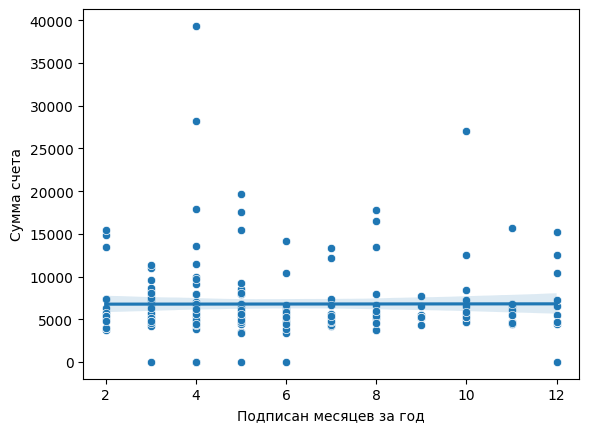

In [94]:
sns.scatterplot(x='Подписан месяцев за год', y='Сумма счета', data=merged_df)
sns.regplot(x='Подписан месяцев за год', y='Сумма счета', data=merged_df, scatter=False)

plt.show()

Линейной зависимости "количества месяцев" и "Суммы счета" не наблюдается. Нельзя сказать о том, что чем больше месяцев в году у клиента была подписка, тем больше была получена сумма. При этом большАя часть клиентов приносит доход за счёт подписок за относительно небольшие суммы

Посмотрим на распределение значений "Суммы счета" по всем клиентам

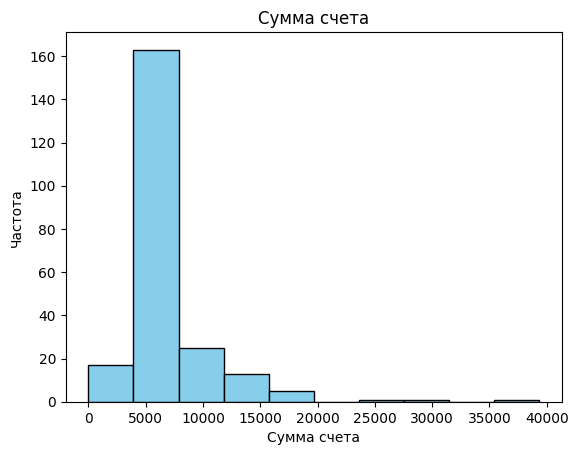

In [95]:
plt.hist(merged_df['Сумма счета'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Сумма счета')
plt.ylabel('Частота')
plt.title('Сумма счета')
plt.show()

Применим ABC-анализ и определим 20% клиентов категории А, которые приносят наибольшую прибыль.

Поскольку зависимости между "количеством месяцев подписки" и "Суммой счета" нет, определим:

1. сколько приносят 20% клиентов с продажами на самые большие суммы
2. сколько приносят 20% клиентов с наибольшим "количеством месяцев подписки" (возможно, более прибыльно продавать подписки с меньшими суммами, но на более продолжительный срок)

и сравним полученные значения для определения наиболее прибыльной группы

In [96]:
# определим 20%
num_rows_20_percent = int(len(merged_df) * 0.2)

# отсортируем по Сумме
merged_df = merged_df.sort_values(by=['Сумма счета', 'Подписан месяцев за год', 'Переподписка', 'ВКСП'], ascending=[False, False, False, False])
# вычисление суммы 'Сумма счета' для первых 20% значений
sum_top_20_percent = merged_df['Сумма счета'].head(num_rows_20_percent).sum()

print("Сумма для первых 20% значений при сортировке по полю 'Сумма счета':            ", round(sum_top_20_percent, 2))

# отсортируем по количеству месяцев подписки за год
merged_df = merged_df.sort_values(by=['Подписан месяцев за год', 'Сумма счета', 'Переподписка', 'ВКСП'], ascending=[False, False, False, False])
# вычисление суммы 'Сумма счета' для первых 20% значений
sum_top_20_percent = merged_df['Сумма счета'].head(num_rows_20_percent).sum()

print("Сумма для первых 20% значений при сортировке по полю 'Подписан месяцев за год':", round(sum_top_20_percent, 2))

Сумма для первых 20% значений при сортировке по полю 'Сумма счета':             584198.59
Сумма для первых 20% значений при сортировке по полю 'Подписан месяцев за год': 308938.75


Можем сделать вывод, что продавать подписки за бОльшие "Суммы счета" выгоднее, чем на бОльшее количество месяцев.

# Проанализируем клиентов Категории А

In [97]:
# отсортируем набор данных еще раз по "Сумме счета"
merged_df = merged_df.sort_values(by=['Сумма счета', 'Подписан месяцев за год', 'Переподписка', 'ВКСП'], ascending=[False, False, False, False])

# Отберем 20% клиентов Категории А
df_A = merged_df.head(num_rows_20_percent)

In [98]:
# функция для построения гистограммы
def showhist(field):
    plt.hist(df_A[field], bins=10, color='skyblue', edgecolor='black')
    plt.xlabel(field)
    plt.ylabel('Частота')
    plt.title(field)
    plt.show()

# функция для отображения статистики
def showstats(value_counts):
    for value, count in value_counts.items():
        percentage = (count / len(df_A)) * 100
        print(f'Значение: {value}, Количество: {count}, Процент: {percentage:.2f}%')

# итоговый список
result = []

Посмотрим распределение значений в столбце "ВКСП"

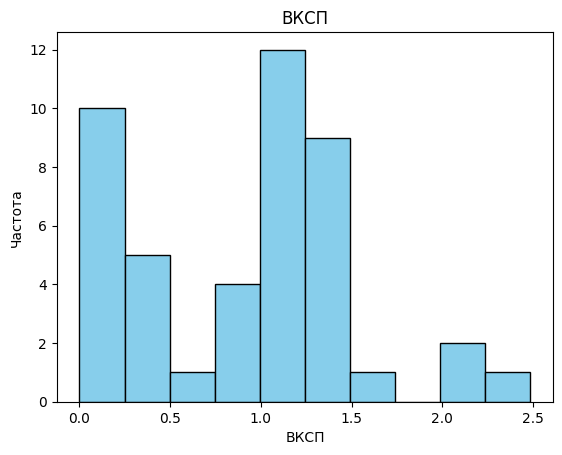

In [99]:
showhist('ВКСП')

Распределение неоднородное, для описания используем среднее

In [100]:
most_common_value = round(df_A['ВКСП'].mean(), 4)
result.append(f'Среднее значение "ВКСП": {most_common_value}')
most_common_value

0.8519

Посмотрим распределение значений в столбце "Сумма счета"

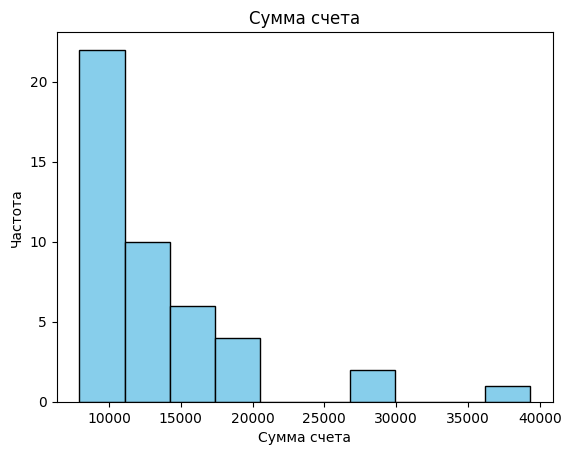

In [101]:
showhist('Сумма счета')

Для описания используем среднее

In [102]:
most_common_value = round(df_A['Сумма счета'].mean(), 2)
result.append(f'Среднее значение "Сумма счета": {most_common_value}')
most_common_value

12982.19

Посмотрим распределение значений в столбце "Подписан месяцев за год"

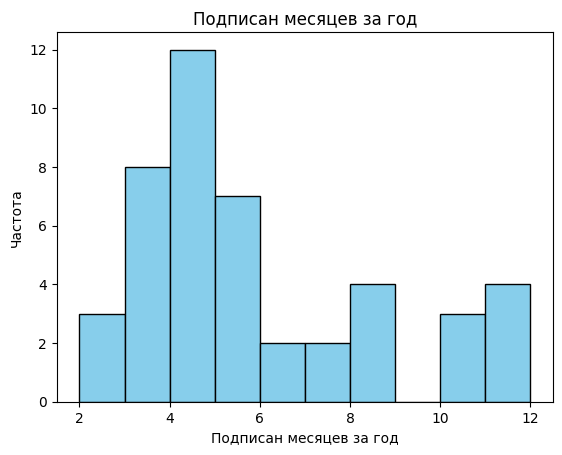

In [103]:
showhist('Подписан месяцев за год')

Для описания используем среднее

In [104]:
most_common_value = round(df_A['Подписан месяцев за год'].mean())
result.append(f'Среднее значение "Подписан месяцев за год": {most_common_value}')
most_common_value

6

Посмотрим распределение значений в столбце "Количество пользователей систем"

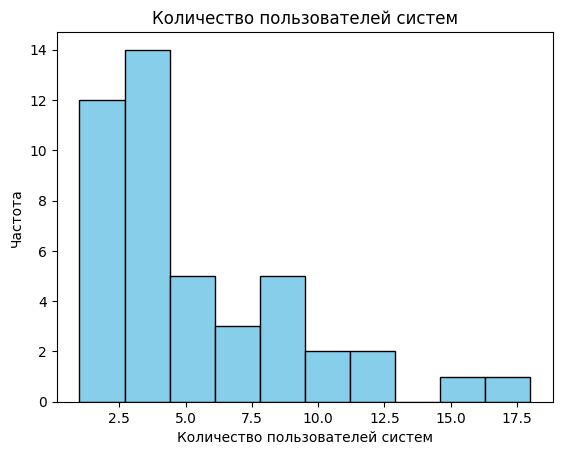

In [105]:
showhist('Количество пользователей систем')

Для описания используем среднее

In [106]:
most_common_value = round(df_A['Количество пользователей систем'].mean())
result.append(f'Среднее значение "Количество пользователей систем": {most_common_value}')
most_common_value

5

Посмотрим распределение значений в столбце "Вид деятельности"

In [107]:
value_counts = df_A['Вид деятельности'].value_counts()
showstats(value_counts)

Значение: Иные услуги, Количество: 8, Процент: 17.78%
Значение: Государственная структура, Количество: 7, Процент: 15.56%
Значение: Медицина. Здравоохранение, Количество: 6, Процент: 13.33%
Значение: Наука и образование, Количество: 4, Процент: 8.89%
Значение: Промышленность. Производство, Количество: 4, Процент: 8.89%
Значение: Спорт, Количество: 3, Процент: 6.67%
Значение: Строительство, Количество: 3, Процент: 6.67%
Значение: Финансы, кредит, инвестирование, Количество: 2, Процент: 4.44%
Значение: Пропущенное значение, Количество: 2, Процент: 4.44%
Значение: Общественные, Религиозные, Социальные, Политические организации, Количество: 2, Процент: 4.44%
Значение: Жилищно-коммунальное хозяйство, Количество: 1, Процент: 2.22%
Значение: Юридические услуги, Количество: 1, Процент: 2.22%
Значение: СМИ. Реклама. Маркетинг, Количество: 1, Процент: 2.22%
Значение: Торговля-опт, Количество: 1, Процент: 2.22%


Добавим значения с наибольшей частотой повторений

In [108]:
s = ''
for value, count in value_counts.items():
    percentage = (count / len(df_A)) * 100
    if percentage > 10:
        s = s + f'{value}: {percentage:.2f}%; '
s = s[:-2]
result.append(f'"Вид деятельности": {s}')

Посмотрим распределение значений в столбце "Территория"

In [109]:
value_counts = df_A['Территория'].value_counts()
showstats(value_counts)

Значение: Красноярск, Количество: 26, Процент: 57.78%
Значение: Минусинское отделение, Количество: 6, Процент: 13.33%
Значение: Норильское отделение, Количество: 6, Процент: 13.33%
Значение: Канское отделение, Количество: 4, Процент: 8.89%
Значение: Лесосибирское отделение, Количество: 2, Процент: 4.44%
Значение: Заозерное отделение, Количество: 1, Процент: 2.22%


Добавим значения с наибольшей частотой повторений

In [110]:
s = ''
for value, count in value_counts.items():
    percentage = (count / len(df_A)) * 100
    if percentage > 50:
        s = s + f'{value}: {percentage:.2f}%; '
s = s[:-2]
result.append(f'"Территория": {s}')

Посмотрим распределение значений в столбце "ОРР"

In [111]:
value_counts = df_A['ОРР'].value_counts()
showstats(value_counts)

Значение: ООО, Количество: 12, Процент: 26.67%
Значение: Пропущенное значение, Количество: 4, Процент: 8.89%
Значение: КГБУЗ, Количество: 4, Процент: 8.89%
Значение: КГБУСО, Количество: 4, Процент: 8.89%
Значение: МБУ, Количество: 3, Процент: 6.67%
Значение: КГАУ, Количество: 2, Процент: 4.44%
Значение: КГКУ, Количество: 2, Процент: 4.44%
Значение: МКУ, Количество: 2, Процент: 4.44%
Значение: КГБУ, Количество: 2, Процент: 4.44%
Значение: КГБПОУ, Количество: 1, Процент: 2.22%
Значение: ФГУП, Количество: 1, Процент: 2.22%
Значение: АО, Количество: 1, Процент: 2.22%
Значение: ИП, Количество: 1, Процент: 2.22%
Значение: МУ, Количество: 1, Процент: 2.22%
Значение: АНО, Количество: 1, Процент: 2.22%
Значение: ОАО, Количество: 1, Процент: 2.22%
Значение: МАУ, Количество: 1, Процент: 2.22%
Значение: МП, Количество: 1, Процент: 2.22%
Значение: КГООУ СПО, Количество: 1, Процент: 2.22%


Добавим значения с наибольшей частотой повторений

In [112]:
s = ''
for value, count in value_counts.items():
    percentage = (count / len(df_A)) * 100
    if percentage > 20:
        s = s + f'{value}: {percentage:.2f}%; '
s = s[:-2]
result.append(f'"ОРР": {s}')

Посмотрим распределение значений в столбце "Сегмент"

In [113]:
value_counts = df_A['Сегмент'].value_counts()
showstats(value_counts)

Значение: Средний, Количество: 25, Процент: 55.56%
Значение: VIP, Количество: 13, Процент: 28.89%
Значение: Локальный, Количество: 6, Процент: 13.33%
Значение: Пропущенное значение, Количество: 1, Процент: 2.22%


Добавим значения с наибольшей частотой повторений

In [114]:
s = ''
for value, count in value_counts.items():
    percentage = (count / len(df_A)) * 100
    if percentage > 20:
        s = s + f'{value}: {percentage:.2f}%; '
s = s[:-2]
result.append(f'"Сегмент": {s}')

Посмотрим распределение значений в столбце "Коммерческое/Бюджетное"

In [115]:
value_counts = df_A['Коммерческое/Бюджетное'].value_counts()
showstats(value_counts)

Значение: Бюджетное, Количество: 20, Процент: 44.44%
Значение: Коммерческое, Количество: 17, Процент: 37.78%
Значение: Казенное, Количество: 5, Процент: 11.11%
Значение: Автономные, Количество: 3, Процент: 6.67%


Добавим значения с наибольшей частотой повторений

In [116]:
s = ''
for value, count in value_counts.items():
    percentage = (count / len(df_A)) * 100
    if percentage > 30:
        s = s + f'{value}: {percentage:.2f}%; '
s = s[:-2]
result.append(f'"Коммерческое/Бюджетное": {s}')

Посмотрим распределение значений в столбце "Переподписка"

In [117]:
value_counts = df_A['Переподписка'].value_counts()
showstats(value_counts)

Значение: 0, Количество: 45, Процент: 100.00%


Среди клиентов Категории А нет тех, кто оформлял переподписку

In [118]:
result.append(f'Была ли оформлена подписка ранее в этом году: Неважно')

Посмотрим распределение значений в столбце "Оплачивает головная организация"

In [119]:
value_counts = df_A['Оплачивает головная организация'].value_counts()
showstats(value_counts)

Значение: 0, Количество: 45, Процент: 100.00%


Среди клиентов Категории А нет тех, у кого значение "Сумма счета" в "Продажах за год" было пропущено (предположительно это клиенты, за системы которых платит их головная организация)

In [120]:
result.append(f'Оплачивается головной организацией: Неважно')

# Конечный результат

In [121]:
print('Портрет клиента, который лучше всего подходит для работы по продаже менеджеру:')
print()

for i in result:
    print(i)

Портрет клиента, который лучше всего подходит для работы по продаже менеджеру:

Среднее значение "ВКСП": 0.8519
Среднее значение "Сумма счета": 12982.19
Среднее значение "Подписан месяцев за год": 6
Среднее значение "Количество пользователей систем": 5
"Вид деятельности": Иные услуги: 17.78%; Государственная структура: 15.56%; Медицина. Здравоохранение: 13.33%
"Территория": Красноярск: 57.78%
"ОРР": ООО: 26.67%
"Сегмент": Средний: 55.56%; VIP: 28.89%
"Коммерческое/Бюджетное": Бюджетное: 44.44%; Коммерческое: 37.78%
Была ли оформлена подписка ранее в этом году: Неважно
Оплачивается головной организацией: Неважно


# Вывод

На основании предоставленных данных было выявлено, что продавать подписки за бОльшие "Суммы счета" выгоднее, чем на бОльшее количество месяцев.

Используя ABC-анализ была выявлена "Категория А" клиентов, которые принесли наибольший доход компании. 

На основании данных клиентов "Категории А" были определены средние значения для количественных переменных, самые распространенные значения номинативных переменных, определена важность переподписки и оплаты головной организации, и составлен портрет клиента, который лучше всего подходит для работы по продаже менеджеру.

# Рекомендации

Настроить процесс проверки данных перед добавлением в документ (например: использовать даты в одном формате, использовать одинаковые наименования для "краевое государственное казенное учреждение" и "КГКУ" и тд.).

Возможно, будет удобнее фиксировать даты покупки и окончания подписок в одном файле, где каждому столбцу будет соответствовать определенный месяц+год. Это упростит работу с теми клиентами, которые покупают подписку не в первый раз.